In [1]:
from urllib import request
resp = request.urlopen('https://movie.douban.com/cinema/nowplaying/xian/')
html_data = resp.read().decode('utf-8')

In [2]:
print(html_data)

<!DOCTYPE html>
<html lang="zh-cmn-Hans" class="">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <title>
    西安 - 在线购票&amp;影讯
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    
    <meta name="keywords" content="西安,在线购票,网上电影票预订,优惠电影票,影讯,排片,放映时间,电影票价"/>
    <meta name="description" content="西安电影院在线优惠购票及影讯排片查询"/>

    <link rel="apple-touch-icon" href="/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/bf61b1fa02f564a4a8f809da7c7179b883a56146/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22d3284848/css/separation/_all.css" rel="stylesheet" type="text/css">
    <link href="https://img3.do

In [6]:
from bs4 import BeautifulSoup as bs
soup = bs(html_data, 'html.parser')    
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')
print(nowplaying_movie_list[0])

<li class="list-item" data-actors="徐峥 / 王传君 / 周一围" data-category="nowplaying" data-director="文牧野" data-duration="117分钟" data-enough="True" data-region="中国大陆" data-release="2018" data-score="8.9" data-showed="True" data-star="45" data-subject="26752088" data-title="我不是药神" data-votecount="567451" id="26752088">
<ul class="">
<li class="poster">
<a class="ticket-btn" data-psource="poster" href="https://movie.douban.com/subject/26752088/?from=playing_poster" target="_blank">
<img alt="我不是药神" class="" rel="nofollow" src="https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2519070834.jpg"/>
</a>
</li>
<li class="stitle">
<a class="ticket-btn" data-psource="title" href="https://movie.douban.com/subject/26752088/?from=playing_poster" target="_blank" title="我不是药神">
                                    我不是药神
                                </a>
</li>
<li class="srating">
<span class="rating-star allstar45"></span>
<span class="subject-rate">8.9</span>
</li>
<li class="sbtn">
<a class="tic

In [10]:
print(nowplaying_list[0])

{'id': '26752088', 'name': '我不是药神'}


In [9]:
nowplaying_list = [] 
for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']       
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict)
        
print(nowplaying_list)

[{'id': '26752088', 'name': '我不是药神'}, {'id': '26804147', 'name': '摩天营救'}, {'id': '26366496', 'name': '邪不压正'}, {'id': '26925317', 'name': '动物世界'}, {'id': '30198729', 'name': '新大头儿子和小头爸爸3：俄罗斯奇遇记'}, {'id': '26416062', 'name': '侏罗纪世界2'}, {'id': '25849049', 'name': '超人总动员2'}, {'id': '30227725', 'name': '小悟空'}, {'id': '26905469', 'name': '金蝉脱壳2：冥府'}, {'id': '30255216', 'name': '您一定不要错过'}, {'id': '1305690', 'name': '阿飞正传'}, {'id': '26813286', 'name': '幸福马上来'}, {'id': '26746958', 'name': '阿修罗'}, {'id': '26818314', 'name': '猛虫过江'}, {'id': '30203509', 'name': '铁笼'}, {'id': '30249257', 'name': '天佑之爱'}, {'id': '30235134', 'name': '细思极恐'}, {'id': '30241999', 'name': '姽婳'}]


In [17]:
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[0]['id'] + '/comments' +'?' +'start=0' + '&limit=20' 
resp = request.urlopen(requrl) 
html_data = resp.read().decode('utf-8') 
soup = bs(html_data, 'html.parser') 
comment_div_lits = soup.find_all('div', class_='comment')

In [18]:
print(comment_div_lits)

[<div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">33106</span>
<input type="hidden" value="1399293202">
<a class="j a_show_login" href="javascript:;" onclick="">有用</a>
</input></span>
<span class="comment-info">
<a class="" href="https://www.douban.com/people/175623093/">忻钰坤</a>
<span>看过</span>
<span class="allstar50 rating" title="力荐"></span>
<span class="comment-time " title="2018-07-04 01:06:03">
                    2018-07-04
                </span>
</span>
</h3>
<p class="">
<span class="short">“你敢保证你一辈子不得病？”纯粹、直接、有力！常常感叹：电影只能是电影。但每看到这样的佳作，又感慨：电影不只是电影！由衷的希望这部电影大卖！成为话题！成为榜样！成为国产电影最该有的可能。</span>
</p>
</div>, <div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">32016</span>
<input type="hidden" value="1398035256">
<a class="j a_show_login" href="javascript:;" onclick="">有用</a>
</input></span>
<span class="comment-info">
<a class="" href="https://www.douban.com/people/mzh2015/">沐子荒</a>
<span>看过</span>
<span class="allstar50 rating" title

In [51]:

for item in comment_div_lits:
    print(item.find_all('span', 'short')[0])

<span class="short">“你敢保证你一辈子不得病？”纯粹、直接、有力！常常感叹：电影只能是电影。但每看到这样的佳作，又感慨：电影不只是电影！由衷的希望这部电影大卖！成为话题！成为榜样！成为国产电影最该有的可能。</span>
<span class="short">王传君所有不被外人理解的坚持，都在这一刻得到了完美释放。他不是关谷神奇，他是王传君。
你看，即使依旧烂片如云，只要还有哪怕极少的人坚持，中国影视也终于还是从中生出了茁壮的根。
我不是药神，治不好这世界。但能改变一点，总归是会好的。</span>
<span class="short">别说这是“中国版《达拉斯买家俱乐部》”了，这是中国的真实事件改编的中国电影，是属于我们自己的电影。不知道就去百度一下“陆勇”，他卖印度抗癌药的时候《达拉斯买家俱乐部》还没上映呢。所以别提《达拉斯买家俱乐部》了，只会显得你无知。（别私信我了，我800年前就知道《达拉斯》也是真事改编）</span>
<span class="short">放豆瓣语境下，是部时至今日终于拍出来的国产“高分韩国电影”——拿现实题材拍商业类型片，社会性意义摆在那，群戏也处理得相当不错。对我们国家而言，这样的电影多一部是一部，走一步是一步。</span>
<span class="short">最大的病，其实是穷病。真的被感动了，整体都很成熟，也有些许韩片的影子。几个演员表演都非常出色。可看性和内在的表达都不错。这个世界最荒诞在于，越贴近真实，真实越荒诞。人这一生，太不易了。最后，王传君，加油哦！</span>
<span class="short">文牧野眼睛太毒了，观众的笑点、泪点、痛点被他牢牢抓住，徐峥现在不拼演技开始掏心炸肺放脱自我了，药物在中国绝对是个“不可说”，但这个电影说了它能说的，也不显山不漏水的说了它所不能说的，讲的是现实，但看过电影之后才会明白其实是超现实，2018最佳!</span>
<span class="short">“今后都会越来越好吧，希望这一天早点来”口罩成为符号，不是雾霾，而是人性的仪式，结尾竟然看到《辛德勒名单》一样的救赎。通俗感人，上海电影节首映哭倒一片，基于真实事件改编的社会意义加分，或许《我不是药神》之于中国，就像《摔跤吧爸爸》之于印度吧…能看到就不错。“其实只有一种病：穷病”</span>


In [52]:
eachCommentList = []
for item in comment_div_lits:
    if item.find_all('span', 'short')[0].string is not None:
        eachCommentList.append(item.find_all('span', 'short')[0].string)
        
print(eachCommentList)

['“你敢保证你一辈子不得病？”纯粹、直接、有力！常常感叹：电影只能是电影。但每看到这样的佳作，又感慨：电影不只是电影！由衷的希望这部电影大卖！成为话题！成为榜样！成为国产电影最该有的可能。', '王传君所有不被外人理解的坚持，都在这一刻得到了完美释放。他不是关谷神奇，他是王传君。\n你看，即使依旧烂片如云，只要还有哪怕极少的人坚持，中国影视也终于还是从中生出了茁壮的根。\n我不是药神，治不好这世界。但能改变一点，总归是会好的。', '别说这是“中国版《达拉斯买家俱乐部》”了，这是中国的真实事件改编的中国电影，是属于我们自己的电影。不知道就去百度一下“陆勇”，他卖印度抗癌药的时候《达拉斯买家俱乐部》还没上映呢。所以别提《达拉斯买家俱乐部》了，只会显得你无知。（别私信我了，我800年前就知道《达拉斯》也是真事改编）', '放豆瓣语境下，是部时至今日终于拍出来的国产“高分韩国电影”——拿现实题材拍商业类型片，社会性意义摆在那，群戏也处理得相当不错。对我们国家而言，这样的电影多一部是一部，走一步是一步。', '最大的病，其实是穷病。真的被感动了，整体都很成熟，也有些许韩片的影子。几个演员表演都非常出色。可看性和内在的表达都不错。这个世界最荒诞在于，越贴近真实，真实越荒诞。人这一生，太不易了。最后，王传君，加油哦！', '文牧野眼睛太毒了，观众的笑点、泪点、痛点被他牢牢抓住，徐峥现在不拼演技开始掏心炸肺放脱自我了，药物在中国绝对是个“不可说”，但这个电影说了它能说的，也不显山不漏水的说了它所不能说的，讲的是现实，但看过电影之后才会明白其实是超现实，2018最佳!', '“今后都会越来越好吧，希望这一天早点来”口罩成为符号，不是雾霾，而是人性的仪式，结尾竟然看到《辛德勒名单》一样的救赎。通俗感人，上海电影节首映哭倒一片，基于真实事件改编的社会意义加分，或许《我不是药神》之于中国，就像《摔跤吧爸爸》之于印度吧…能看到就不错。“其实只有一种病：穷病”', '人生建议：别买零食，吃不下的。', '最喜欢王传君的表演啊，几乎所有泪点都给他了！！而他曾经的同伴们，下月继续拿《爱情公寓》电影版面对观众。这个圈子里还是有不爱赚快钱的年轻演员，真好。', '小时候路过一家药店，门口的对联写着“只愿世间无疾病，何愁架上药染尘”', '王传君终于做了一个正确的决定，没有去参演那部死妈电影', '

In [56]:
comments = ''
for k in range(len(eachCommentList)):
    comments = comments + (str(eachCommentList[k])).strip()
print(eachCommentList)

['“你敢保证你一辈子不得病？”纯粹、直接、有力！常常感叹：电影只能是电影。但每看到这样的佳作，又感慨：电影不只是电影！由衷的希望这部电影大卖！成为话题！成为榜样！成为国产电影最该有的可能。', '王传君所有不被外人理解的坚持，都在这一刻得到了完美释放。他不是关谷神奇，他是王传君。\n你看，即使依旧烂片如云，只要还有哪怕极少的人坚持，中国影视也终于还是从中生出了茁壮的根。\n我不是药神，治不好这世界。但能改变一点，总归是会好的。', '别说这是“中国版《达拉斯买家俱乐部》”了，这是中国的真实事件改编的中国电影，是属于我们自己的电影。不知道就去百度一下“陆勇”，他卖印度抗癌药的时候《达拉斯买家俱乐部》还没上映呢。所以别提《达拉斯买家俱乐部》了，只会显得你无知。（别私信我了，我800年前就知道《达拉斯》也是真事改编）', '放豆瓣语境下，是部时至今日终于拍出来的国产“高分韩国电影”——拿现实题材拍商业类型片，社会性意义摆在那，群戏也处理得相当不错。对我们国家而言，这样的电影多一部是一部，走一步是一步。', '最大的病，其实是穷病。真的被感动了，整体都很成熟，也有些许韩片的影子。几个演员表演都非常出色。可看性和内在的表达都不错。这个世界最荒诞在于，越贴近真实，真实越荒诞。人这一生，太不易了。最后，王传君，加油哦！', '文牧野眼睛太毒了，观众的笑点、泪点、痛点被他牢牢抓住，徐峥现在不拼演技开始掏心炸肺放脱自我了，药物在中国绝对是个“不可说”，但这个电影说了它能说的，也不显山不漏水的说了它所不能说的，讲的是现实，但看过电影之后才会明白其实是超现实，2018最佳!', '“今后都会越来越好吧，希望这一天早点来”口罩成为符号，不是雾霾，而是人性的仪式，结尾竟然看到《辛德勒名单》一样的救赎。通俗感人，上海电影节首映哭倒一片，基于真实事件改编的社会意义加分，或许《我不是药神》之于中国，就像《摔跤吧爸爸》之于印度吧…能看到就不错。“其实只有一种病：穷病”', '人生建议：别买零食，吃不下的。', '最喜欢王传君的表演啊，几乎所有泪点都给他了！！而他曾经的同伴们，下月继续拿《爱情公寓》电影版面对观众。这个圈子里还是有不爱赚快钱的年轻演员，真好。', '小时候路过一家药店，门口的对联写着“只愿世间无疾病，何愁架上药染尘”', '王传君终于做了一个正确的决定，没有去参演那部死妈电影', '

In [57]:
import re
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)
print(cleaned_comments)

你敢保证你一辈子不得病纯粹直接有力常常感叹电影只能是电影但每看到这样的佳作又感慨电影不只是电影由衷的希望这部电影大卖成为话题成为榜样成为国产电影最该有的可能王传君所有不被外人理解的坚持都在这一刻得到了完美释放他不是关谷神奇他是王传君你看即使依旧烂片如云只要还有哪怕极少的人坚持中国影视也终于还是从中生出了茁壮的根我不是药神治不好这世界但能改变一点总归是会好的别说这是中国版达拉斯买家俱乐部了这是中国的真实事件改编的中国电影是属于我们自己的电影不知道就去百度一下陆勇他卖印度抗癌药的时候达拉斯买家俱乐部还没上映呢所以别提达拉斯买家俱乐部了只会显得你无知别私信我了我年前就知道达拉斯也是真事改编放豆瓣语境下是部时至今日终于拍出来的国产高分韩国电影拿现实题材拍商业类型片社会性意义摆在那群戏也处理得相当不错对我们国家而言这样的电影多一部是一部走一步是一步最大的病其实是穷病真的被感动了整体都很成熟也有些许韩片的影子几个演员表演都非常出色可看性和内在的表达都不错这个世界最荒诞在于越贴近真实真实越荒诞人这一生太不易了最后王传君加油哦文牧野眼睛太毒了观众的笑点泪点痛点被他牢牢抓住徐峥现在不拼演技开始掏心炸肺放脱自我了药物在中国绝对是个不可说但这个电影说了它能说的也不显山不漏水的说了它所不能说的讲的是现实但看过电影之后才会明白其实是超现实最佳今后都会越来越好吧希望这一天早点来口罩成为符号不是雾霾而是人性的仪式结尾竟然看到辛德勒名单一样的救赎通俗感人上海电影节首映哭倒一片基于真实事件改编的社会意义加分或许我不是药神之于中国就像摔跤吧爸爸之于印度吧能看到就不错其实只有一种病穷病人生建议别买零食吃不下的最喜欢王传君的表演啊几乎所有泪点都给他了而他曾经的同伴们下月继续拿爱情公寓电影版面对观众这个圈子里还是有不爱赚快钱的年轻演员真好小时候路过一家药店门口的对联写着只愿世间无疾病何愁架上药染尘王传君终于做了一个正确的决定没有去参演那部死妈电影只要提到价值中国电影的标准便会坍塌明眼人都看得出幕后黑哪是一脸奸相的大药厂又或者结尾辩方律师可以再底气不足一些前后大发感言的两名老太表演模式有何本质不同徐峥的转变与倒贴全是目睹惨相的愧疚觉悟而在这样一部电影里最不缺的就是惨被消灭的何止是戴口罩的病人你的一个举动可能会改变别人的一生酒吧领班从此爱上了钢管舞比较反感这类戴着批判现实主义帽子的电影却使用了大量讨好大众的商业

In [58]:
import jieba
import pandas as pd
segment = jieba.lcut(cleaned_comments)
words_df = pd.DataFrame({'segment':segment})
words_df.head()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\11320\AppData\Local\Temp\jieba.cache
Loading model cost 1.278 seconds.
Prefix dict has been built succesfully.


,segment
0,你
1,敢
2,保证
3,你
4,一辈子


In [61]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_df.head()

,segment
1,敢
2,保证
4,一辈子
6,病
7,纯粹


In [62]:
import numpy
words_stat = words_df.groupby(
by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat = words_stat.reset_index().sort_values(
by=["计数"], ascending=False)

words_stat.head()

C:\Users\11320\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,segment,计数
329,电影,23
35,中国,10
407,说,7
318,王传君,6
343,看到,6


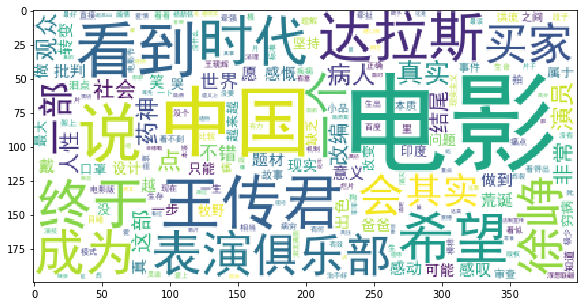

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)

wordcloud=wordcloud.fit_words(dict(word_frequence_list))
plt.imshow(wordcloud)

https://movie.douban.com/subject/26752088/comments?start=0&limit=20
https://movie.douban.com/subject/26752088/comments?start=20&limit=20
https://movie.douban.com/subject/26752088/comments?start=40&limit=20
https://movie.douban.com/subject/26752088/comments?start=60&limit=20
https://movie.douban.com/subject/26752088/comments?start=80&limit=20
https://movie.douban.com/subject/26752088/comments?start=100&limit=20
https://movie.douban.com/subject/26752088/comments?start=120&limit=20
https://movie.douban.com/subject/26752088/comments?start=140&limit=20
https://movie.douban.com/subject/26752088/comments?start=160&limit=20
https://movie.douban.com/subject/26752088/comments?start=180&limit=20


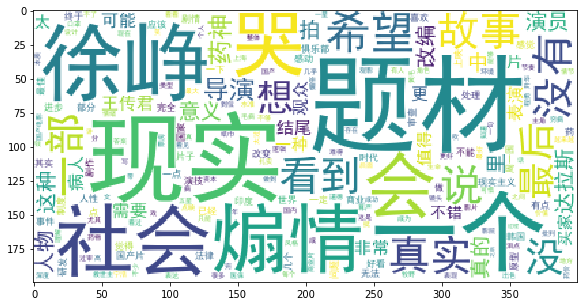

In [82]:
#coding:utf-8

import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import re
import pandas as pd  
import matplotlib.pyplot as plt
from urllib import request
from bs4 import BeautifulSoup as bs
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

#分析网页函数
def getNowPlayingMovie_list():   
    resp = request.urlopen('https://movie.douban.com/cinema/nowplaying/xian/')        
    html_data = resp.read().decode('utf-8')    
    soup = bs(html_data, 'html.parser')    
    nowplaying_movie = soup.find_all('div', id='nowplaying')        
    nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')    
    nowplaying_list = []    
    for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']       
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict)    
    return nowplaying_list

#爬取评论函数
def getCommentsById(movieId, pageNum): 
    eachCommentList = []; 
    if pageNum>0: 
         start = (pageNum-1) * 20 
    else: 
        return False 
    requrl = 'https://movie.douban.com/subject/' + movieId + '/comments' +'?' +'start=' + str(start) + '&limit=20' 
    print(requrl)
    resp = request.urlopen(requrl) 
    html_data = resp.read().decode('utf-8') 
    soup = bs(html_data, 'html.parser') 
    comment_div_lits = soup.find_all('div', class_='comment') 
    for item in comment_div_lits: 
        if item.find_all('span','short')[0].string is not None:     
            eachCommentList.append(item.find_all('span', 'short')[0].string)
    return eachCommentList

def main():
    #循环获取第一个电影的前10页评论
    commentList = []
    NowPlayingMovie_list = getNowPlayingMovie_list()
    for i in range(10):    
        num = i + 1 
        commentList_temp = getCommentsById(NowPlayingMovie_list[0]['id'], num)
        commentList.append(commentList_temp)

    #将列表中的数据转换为字符串
    comments = ''
    for k in range(len(commentList)):
        comments = comments + (str(commentList[k])).strip()

    #使用正则表达式去除标点符号
    pattern = re.compile(r'[\u4e00-\u9fa5]+')
    filterdata = re.findall(pattern, comments)
    cleaned_comments = ''.join(filterdata)

    #使用结巴分词进行中文分词
    segment = jieba.lcut(cleaned_comments)
    words_df=pd.DataFrame({'segment':segment})

    #去掉停用词
    stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
    words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

    #统计词频
    words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
    words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)

    #用词云进行显示
    wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}

    word_frequence_list = []
    for key in word_frequence:
        temp = (key,word_frequence[key])
        word_frequence_list.append(temp)

    wordcloud=wordcloud.fit_words(dict(word_frequence_list))
    plt.imshow(wordcloud)

#主函数
main()